## Boston Housing Dataset
El Boston Housing Dataset contiene información sobre diferentes características de casas en diversas localidades de Boston, con el objetivo de predecir el valor medio de las viviendas (MEDV). Este conjunto de datos fue originalmente publicado por Harrison, D., y Rubinfeld, D.L. en su estudio sobre los efectos de la contaminación del aire en el valor de las propiedades residenciales.

El dataset consta de 506 registros, cada uno representando una vivienda. A continuación se detallan los atributos del dataset:
<ul>
<li>CRIM: Tasa de criminalidad per cápita por ciudad. Tipo numérico.</li>
<li>ZN: Proporción de terrenos residenciales divididos en lotes de más de 25,000 pies cuadrados. Tipo numérico.</li>
<li>INDUS: Proporción de acres comerciales no minoristas por ciudad. Tipo numérico.</li>
<li>CHAS: Variable ficticia Charles River (1 si el tramo limita con el río; 0 en caso contrario). Tipo binaria.</li>
<li>NOX: Concentración de óxidos nítricos (partes por 10 millones). Tipo numérico.</li>
<li>RM: Número medio de habitaciones por vivienda. Tipo numérico.</li>
<li>AGE: Proporción de unidades ocupadas por propietarios construidas antes de 1940. Tipo numérico.</li>
<li>DIS: Distancias ponderadas a cinco centros de empleo en Boston. Tipo numérico.</li>
<li>RAD: Índice de accesibilidad a autopistas radiales. Tipo numérico.</li>
<li>TAX: Tasa de impuesto a la propiedad por cada 10,000 dólares. Tipo numérico.</li>
<li>PTRATIO: Ratio alumno-profesor por ciudad. Tipo numérico.</li>
<li>B: 1000(Bk-0.63)^2 siendo Bk la proporción de negros por ciudad. Tipo numérico.</li>
<li>LSTAT: Porcentaje de población de estatus inferior. Tipo numérico.</li>
<li>MEDV: Valor medio de las viviendas ocupadas por propietarios (en $1000s). Tipo numérico. Variable objetivo.</li>



</ul>

Se puede encontrar en https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

## Cargar datos y realizar un primer análisis

In [ ]:
# Conexión con google drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/proyecto-python/HousingData.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv(path)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Análisis descriptivo de los atributos
print("Descripción de los datos:")
print(df.describe())

Descripción de los datos:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
s

## Tratamiento de los valores nulos

In [ ]:
# Tratar los valores nulos (si hay)
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# Imputar valores nulos con la media de la columna (si hay)
df.fillna(df.mean(), inplace=True)

In [ ]:
# Volvemos a contar nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Análisis de los datos

In [ ]:
# Nombre de las columnas
print("Nombres de las columnas:")
print(df.columns)

Nombres de las columnas:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
# Número de filas y columnas
print("\nNumero de filas y columnas:")
print(df.shape)


Numero de filas y columnas:
(506, 14)


In [ ]:
# Tipo de cada columna
print("\nTipo de cada columna:")
print(df.dtypes)


Tipo de cada columna:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [ ]:
# Calcular la correlación entre los atributos
correlation_matrix = df.corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B    

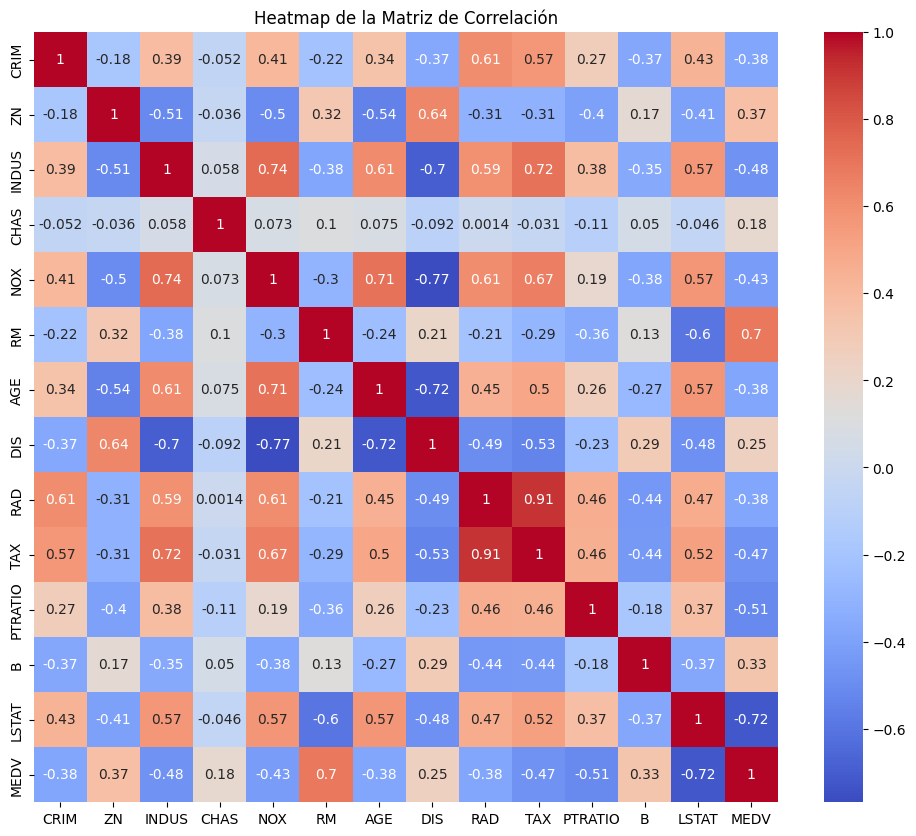

In [ ]:
# Mostrar un mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación')
plt.show()
# TAX y RAD alta correlación positiva, DIS y NOX alta correlación negativa, DIS y AGE alta correlación negativa

In [ ]:
# Eliminar las columnas con alta correlación
df.drop(['RAD','NOX','AGE'], axis=1, inplace=True)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,6.421,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,7.185,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,6.998,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,7.147,6.0622,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,2.4786,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,6.120,2.2875,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,6.976,2.1675,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,6.794,2.3889,273,21.0,393.45,6.480000,22.0


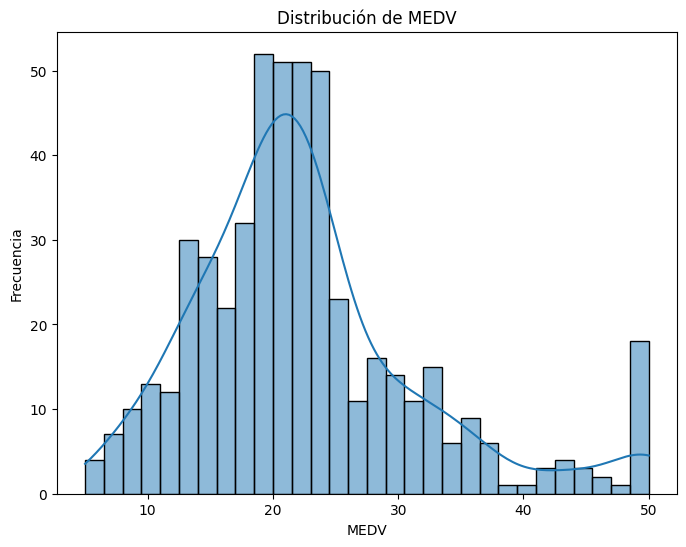

In [ ]:
# Histograma de la variable objetivo (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribución de MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.show()

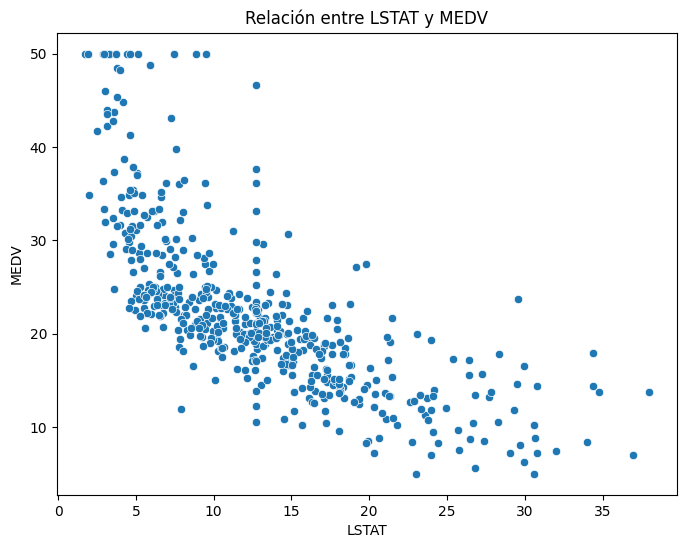

In [ ]:
# Relación entre MEDV y LSTAT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title('Relación entre LSTAT y MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

## Preparación de los datos para los modelos

In [ ]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Inicializar MinMaxScaler
scaler = MinMaxScaler()
# Ajustar y transformar los datos de entrenamiento
X_train_scaled_minMax = scaler.fit_transform(X_train)
# Transformar los datos de prueba
X_test_scaled_minMax = scaler.transform(X_test)

In [ ]:
# Mostrar las formas de los conjuntos de datos preparados
print("Formas de los conjuntos de datos:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Formas de los conjuntos de datos:
X_train: (404, 10), y_train: (404,)
X_test: (102, 10), y_test: (102,)


In [ ]:
def optimize_model(X_train, y_train, X_test, y_test, model_name, param_grid):
    # Importar el modelo basado en el nombre del modelo
    if model_name == 'linear_regression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    elif model_name == 'ridge':
        from sklearn.linear_model import Ridge
        model = Ridge()
    elif model_name == 'lasso':
        from sklearn.linear_model import Lasso
        model = Lasso()
    elif model_name == 'elasticnet':
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    elif model_name == 'decision_tree':
        from sklearn.tree import DecisionTreeRegressor
        model = DecisionTreeRegressor()
    elif model_name == 'random_forest':
        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor()
    elif model_name == 'gradient_boosting':
        from sklearn.ensemble import GradientBoostingRegressor
        model = GradientBoostingRegressor()
    elif model_name == 'xgboost':
        from xgboost import XGBRegressor
        model = XGBRegressor()
    elif model_name == 'knn':
        from sklearn.neighbors import KNeighborsRegressor
        model = KNeighborsRegressor()
    elif model_name == 'svr':
        from sklearn.svm import SVR
        model = SVR()
    elif model_name == 'lightgbm':
        import lightgbm as lgb
        model = lgb.LGBMRegressor()
    else:
        raise ValueError(f"Modelo '{model_name}' no soportado.")

    # Realizar la búsqueda de hiperparámetros
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros
    best_params = grid_search.best_params_

    # Evaluar el modelo con los mejores parámetros en los conjuntos de validación y prueba
    best_model = grid_search.best_estimator_
    y_pred_val = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)

    # Calcular la precisión (en regresión se usa el error cuadrático medio)
    mse_val = mean_squared_error(y_train, y_pred_val)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Convertirlo a raíz del error cuadrático medio
    rmse_val = np.sqrt(mse_val)
    rmse_test = np.sqrt(mse_test)

    return best_model,best_params, rmse_val, rmse_test

In [ ]:

# Ejemplo de uso para cada modelo soportado

# Linear Regression
param_grid_lr = {
}


# Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]  # Regularización, mayor valor significa más regularización
}


# Lasso Regression
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]  # Regularización, mayor valor significa más regularización
}


# ElasticNet
param_grid_elasticnet = {
    'alpha': [0.1, 1, 10, 100],  # Regularización, mayor valor significa más regularización
    'l1_ratio': [0.1, 0.5, 0.9]  # Proporción entre L1 y L2 (0 significa Ridge, 1 significa Lasso)
}


# Decision Tree Regression
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 10, 20]  # Número mínimo de muestras necesarias para dividir un nodo
}


# Random Forest Regression
param_grid_rf = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar para la mejor división
    'max_depth': [None, 10, 20]  # Profundidad máxima de cada árbol
}


# Gradient Boosting Regression
param_grid_gb = {
    'n_estimators': [100, 200],  # Número de etapas de refuerzo
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}


# XGBoost Regression
param_grid_xgb = {
    'n_estimators': [100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}


# K-Nearest Neighbors Regression
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance']  # Tipo de peso a aplicar
}


# Support Vector Regression (SVR)
param_grid_svr = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'epsilon': [0.1, 0.2, 0.5]  # Margen de error dentro del cual no se penaliza
}


# LightGBM Regression
param_grid_lgb = {
    'n_estimators': [100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'num_leaves': [31, 50, 100]  # Número máximo de hojas en cada árbol
}





model_types = [
        {'model_type': 'linear_regression', 'params': param_grid_lr},
        {'model_type': 'ridge', 'params':param_grid_ridge},
        {'model_type': 'lasso', 'params':param_grid_lasso},
        {'model_type': 'elasticnet', 'params':param_grid_elasticnet},
        {'model_type': 'decision_tree', 'params':param_grid_dt},
        {'model_type': 'random_forest', 'params':param_grid_rf},
        {'model_type': 'gradient_boosting', 'params':param_grid_gb},
        {'model_type': 'xgboost', 'params':param_grid_xgb},
        {'model_type': 'knn', 'params':param_grid_knn},
        {'model_type': 'svr', 'params':param_grid_svr},
        {'model_type': 'lightgbm', 'params':param_grid_lgb}
    ]



In [ ]:
# Dataframe con los resultados
resultsDF=pd.DataFrame(columns=['Model','Best Params','Val_RMSE','Test_RMSE'])

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(404, 10)
(102, 10)
(404,)
(102,)


In [ ]:
# Entrenar y almacenar resultados para cada modelo
for model_info in model_types:
    model_type = model_info['model_type']
    model_params = model_info['params']
    print("Evaluando: ",model_type)

    best_model, best_params, val_accuracy, test_accuracy = optimize_model(X_train_scaled, y_train, X_test_scaled, y_test, model_type, model_params)
    resultsDF.loc[len(resultsDF)]=[model_type,best_params,val_accuracy,test_accuracy]

Evaluando:  linear_regression
Evaluando:  ridge
Evaluando:  lasso
Evaluando:  elasticnet
Evaluando:  decision_tree
Evaluando:  random_forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [ ]:
resultsDF

,Model,Best Params,Val_RMSE,Test_RMSE
0,linear_regression,{},4.891844,5.209546
1,ridge,{'alpha': 10},4.894161,5.193324
2,lasso,{'alpha': 0.1},4.905908,5.216551
3,elasticnet,"{'alpha': 0.1, 'l1_ratio': 0.1}",4.917999,5.163013
4,decision_tree,"{'max_depth': 30, 'min_samples_split': 20}",2.201549,4.470773
5,random_forest,"{'max_depth': None, 'max_features': 'sqrt', 'n...",1.390885,3.340392
6,gradient_boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.648752,2.859693
7,xgboost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.756578,2.681135
8,knn,"{'n_neighbors': 7, 'weights': 'distance'}",0.000000,4.681012
9,svr,"{'C': 10, 'epsilon': 0.5}",3.303381,4.036237
